In [199]:
# importing the needed packets.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    make_scorer,
    classification_report,
    ConfusionMatrixDisplay
)
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb

In [200]:
# Loading in the data with , as a delimiter to properly get the data frame loaded.
Customer_Data = pd.read_csv("project_data.csv", delimiter=',')

pd.set_option('display.max_columns', 20)


In [201]:
# sow that the data frame still has issues, so i will remove the added ID column which is called Unnamed: 0
Customer_Data

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,NaN,1.0,1,Returning_Visitor,False,False
1,1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2.0,NaN,2,Returning_Visitor,False,False
2,2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1.0,NaN,3,Returning_Visitor,False,False
3,3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2.0,2.0,4,Returning_Visitor,False,False
4,4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3.0,1.0,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6.0,NaN,1,Returning_Visitor,True,False
12326,12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2.0,1.0,8,Returning_Visitor,True,False
12327,12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2.0,1.0,13,Returning_Visitor,True,False
12328,12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2.0,3.0,11,Returning_Visitor,False,False


In [202]:
Customer_Data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               12330 non-null  int64  
 1   Administrative           12330 non-null  int64  
 2   Administrative_Duration  12330 non-null  float64
 3   Informational            12330 non-null  int64  
 4   Informational_Duration   12330 non-null  float64
 5   ProductRelated           12330 non-null  int64  
 6   ProductRelated_Duration  12330 non-null  float64
 7   BounceRates              12330 non-null  float64
 8   ExitRates                12330 non-null  float64
 9   PageValues               12330 non-null  float64
 10  SpecialDay               12207 non-null  float64
 11  Month                    12330 non-null  object 
 12  OperatingSystems         12330 non-null  int64  
 13  Browser                  12146 non-null  float64
 14  Region                

In [203]:
# now i feel like getting dummies for every month where the model can more easly find correlations between months, due to the amount of our data i think this is a great idea specifically due to the 
# purchasing differences for the months and the unspecified special day in the data set which should get more narrowed down with dummies for all months.

Customer_Data.drop(columns=['Unnamed: 0'], inplace=True)

Customer_Data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,NaN,1.0,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2.0,NaN,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1.0,NaN,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2.0,2.0,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3.0,1.0,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6.0,NaN,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2.0,1.0,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2.0,1.0,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2.0,3.0,11,Returning_Visitor,False,False


In [204]:
# as i assumed the amount of customers coming in has a huge difference from month to month further completing my argument to dummies. 
# i will make the dummies than start looking into cleaning my data and finding specific fixes to the NAN values. 
print(Customer_Data['Month'].value_counts())


Month
May     3196
Nov     2998
Mar     1907
Dec     1727
Oct      549
Aug      433
Jul      432
Sep      359
June     288
Feb      184
Turc     168
Sept      89
Name: count, dtype: int64


In [205]:
# making dummies. 
Customer_Data = pd.get_dummies(Customer_Data, columns=['Month'], dtype=int) 



In [206]:
#before proceeding with my data i now have to find useless high correlated columns, but i cant do this until i have actually made my informations within into numeric terms. 
Customer_Data


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Month_Sept,Month_Turc
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,0


In [207]:
Customer_Data.value_counts('VisitorType')

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

In [208]:
# making dummies for the visitor type because it will find the weight for a new visitor, and a returning visitor aswell as a visitor seen as "other". 
Customer_Data = pd.get_dummies(Customer_Data, columns=['VisitorType'], dtype=int) 

In [209]:
# checking the other columns that i will change just to make sure they are what i think they are. 
Customer_Data.value_counts('Revenue')

Revenue
False    10303
True      1880
Name: count, dtype: int64

In [210]:
# as predicted i thought of Ali possibly changing one of the cleaning columns from an actual true/false into a string based true/false, to confuse the student and hide values. 
Customer_Data.value_counts('Weekend')

Weekend
False        9273
True         2868
Name:Zara     189
Name: count, dtype: int64

In [211]:
# making zara into nan value to use KNN imputer which helps me save the content within those rows, whilst not just giving my model false information.
Customer_Data['Weekend'].replace('Name:Zara', pd.NA, inplace=True)

# Converting 'True' and 'False' strings to 1 and 0
Customer_Data['Weekend'] = Customer_Data['Weekend'].map({'True': 1, 'False': 0})

# Performing KNN imputation
imputer = KNNImputer(n_neighbors=5)
Customer_Data['Weekend'] = imputer.fit_transform(Customer_Data[['Weekend']])

# Converting them back to boolean values
Customer_Data['Weekend'] = Customer_Data['Weekend'].astype(bool)

print(Customer_Data['Weekend'].value_counts())

Weekend
False    9273
True     3057
Name: count, dtype: int64


In [212]:
Customer_Data['Weekend']

0        False
1        False
2        False
3        False
4         True
         ...  
12325     True
12326     True
12327     True
12328    False
12329     True
Name: Weekend, Length: 12330, dtype: bool

In [213]:
# now i can finally do my numeric changes into my data.
#  as i said weekend was a string so i have to use a string based ''True'' and the real true for revenue column. 

Customer_Data['Revenue'] = [1 if Revenue == True else 0 for Revenue in Customer_Data['Revenue']]

Customer_Data


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Month_Sept,Month_Turc,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,1


In [214]:
Customer_Data.value_counts('Weekend')


Weekend
False    9273
True     3057
Name: count, dtype: int64

In [215]:
Customer_Data.value_counts('Revenue')

Revenue
0    10450
1     1880
Name: count, dtype: int64

In [216]:
# looking into the max values for each column to find statistical divergents, such as possibly people going away from keyboard while on the page which will artifically increase for example  ProductRelated_Duration

Customer_Data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Month_Sept,Month_Turc,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12207.00000,...,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.238200,1269.776004,0.503569,34.472398,31.731468,1194.746220,0.044239,0.043073,5.889258,0.06126,...,0.154663,0.259205,0.243147,0.044526,0.029116,0.007218,0.013625,0.137388,0.006894,0.855718
std,3.409269,34071.466930,1.270156,140.749294,44.475503,1913.669288,0.239735,0.048597,18.568437,0.19865,...,0.361598,0.438216,0.429000,0.206268,0.168138,0.084656,0.115934,0.344271,0.082745,0.351390
min,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.498680,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,598.936905,0.002896,0.025156,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,93.787500,0.000000,0.000000,38.000000,1464.157214,0.018029,0.050000,0.000000,0.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,27.000000,989493.000000,24.000000,2549.375000,705.000000,63973.522230,2.098952,0.200000,361.763742,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


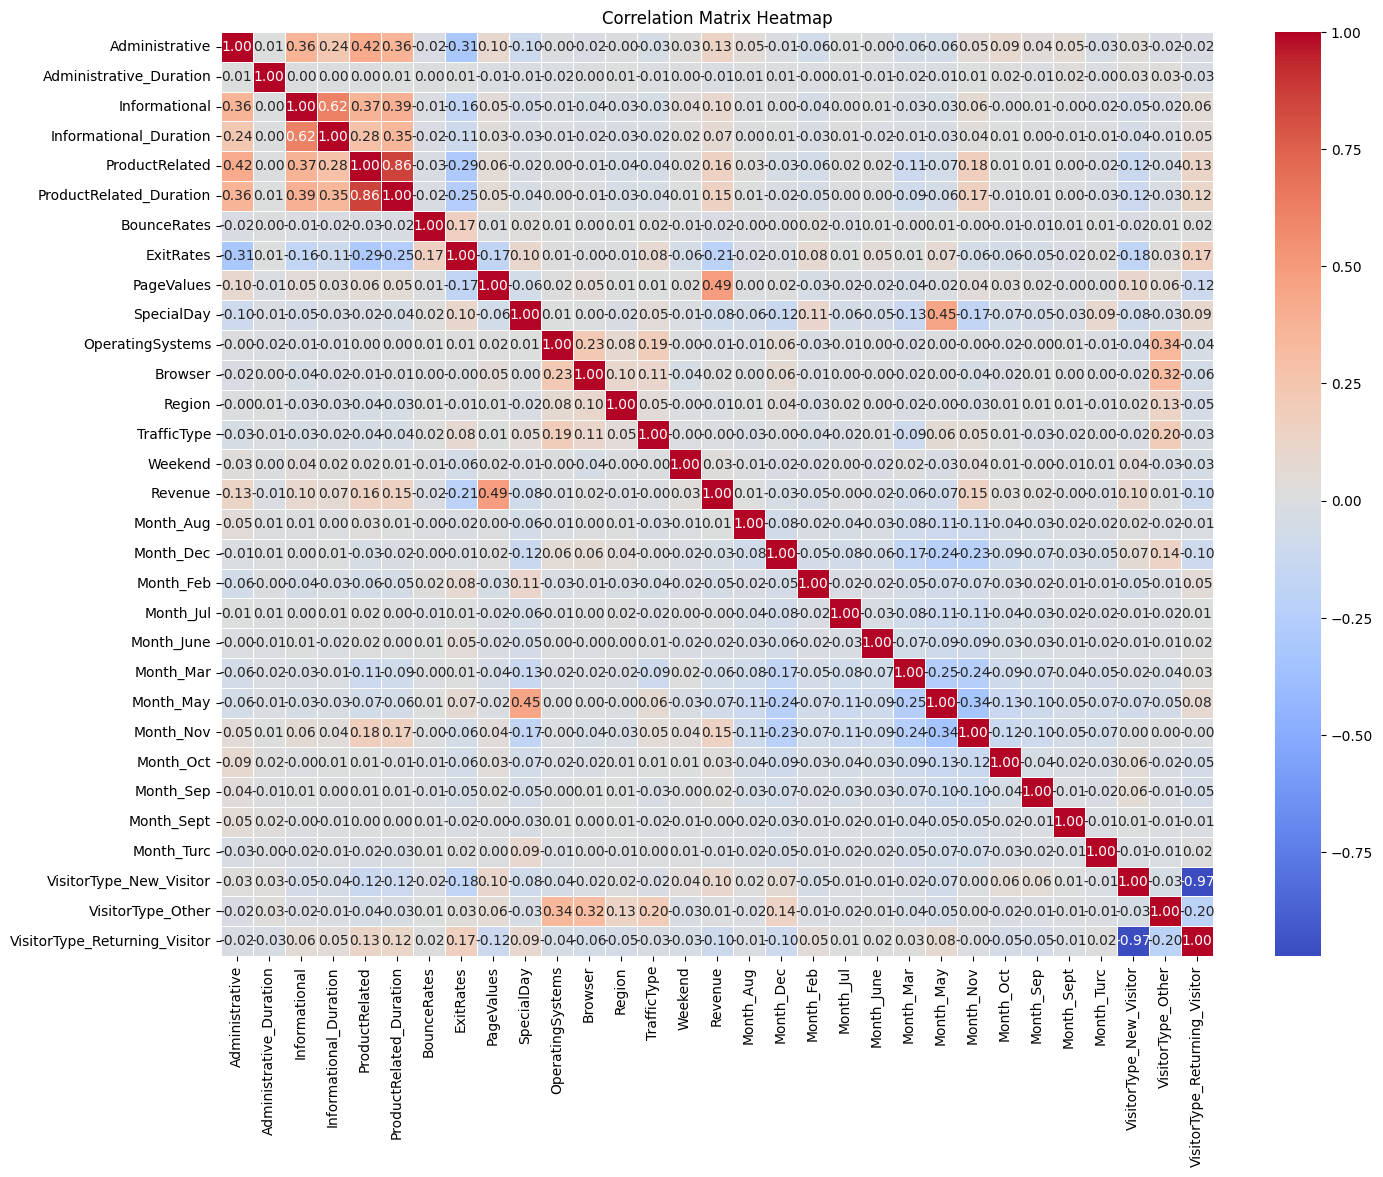

In [217]:
# using a heatmap based corr to better understand whats happening, i like what im seeing alot though i feel like only keeping the duration values of product, informational etc. 
# so i will remove those who arent the duration version. 
correlation_matrix = Customer_Data.corr()


plt.figure(figsize=(16, 12))  

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [218]:
# sept turc are 3 useless columns that arent even correct so i decide to remove them aswell. 
Customer_Data.drop(columns=['ProductRelated','Informational','Administrative','Month_Sept','Month_Turc',], inplace=True)


In [219]:
# Revenue, Region, Browser, SpecialDay. obviously these are already very important so i have to remove their nan values even if it risks me losing the data in those rows.


Customer_Data.dropna(subset=['Revenue', 'Region','Browser','SpecialDay'], inplace=True)

In [220]:
Customer_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11785 entries, 3 to 12329
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative_Duration        11785 non-null  float64
 1   Informational_Duration         11785 non-null  float64
 2   ProductRelated_Duration        11785 non-null  float64
 3   BounceRates                    11785 non-null  float64
 4   ExitRates                      11785 non-null  float64
 5   PageValues                     11785 non-null  float64
 6   SpecialDay                     11785 non-null  float64
 7   OperatingSystems               11785 non-null  int64  
 8   Browser                        11785 non-null  float64
 9   Region                         11785 non-null  float64
 10  TrafficType                    11785 non-null  int64  
 11  Weekend                        11785 non-null  bool   
 12  Revenue                        11785 non-null  int6

In [221]:
Customer_Data.describe()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,11785.000000,11785.000000,11785.000000,11785.000000,11785.000000,11785.000000,11785.000000,11785.000000,11785.000000,11785.000000,...,11785.000000,11785.000000,11785.000000,11785.000000,11785.000000,11785.000000,11785.000000,11785.000000,11785.000000,11785.000000
mean,1242.022866,34.200103,1198.014220,0.043416,0.042862,5.893886,0.061315,2.125583,2.366992,3.146033,...,0.034790,0.023674,0.155112,0.258210,0.243190,0.044888,0.029529,0.137293,0.006873,0.855834
std,33686.822866,140.252825,1915.527361,0.238202,0.048364,18.538125,0.198939,0.913621,1.728857,2.402118,...,0.183255,0.152038,0.362027,0.437668,0.429027,0.207066,0.169291,0.344171,0.082623,0.351273
min,0.000000,0.000000,0.000000,-0.498680,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,186.000000,0.000000,0.014267,0.000000,0.000000,2.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,8.000000,0.000000,600.500000,0.002883,0.025088,0.000000,0.000000,2.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,93.106667,0.000000,1470.416667,0.017857,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,989493.000000,2549.375000,63973.522230,2.088658,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


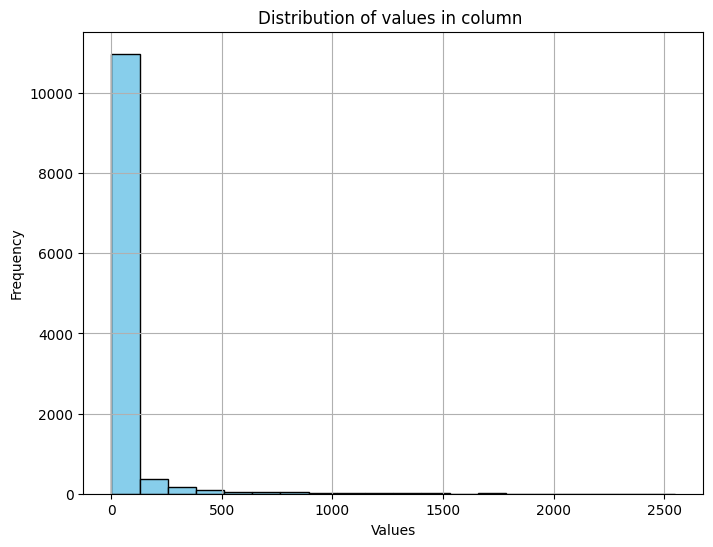

In [222]:
# now i can finally check the statistical divergents within certain columns. 

plt.figure(figsize=(8, 6))
plt.hist(Customer_Data['Informational_Duration'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of values in column ')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

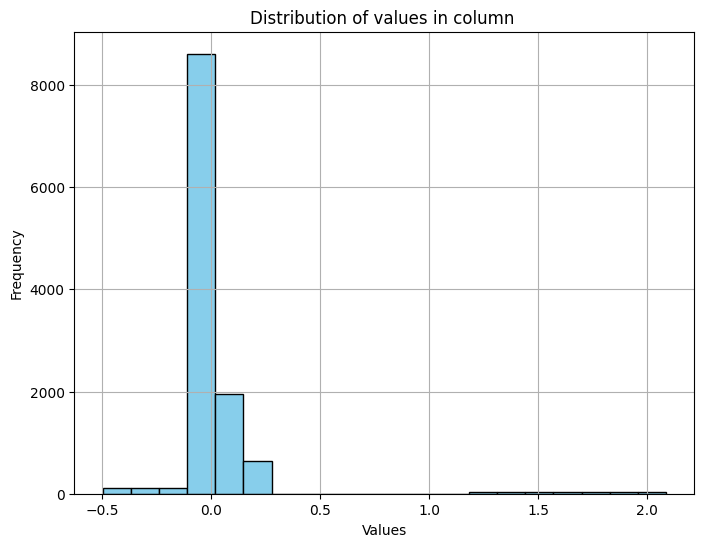

In [223]:
# now i can finally check the statistical divergents within certain columns. 

plt.figure(figsize=(8, 6))
plt.hist(Customer_Data['BounceRates'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of values in column ')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

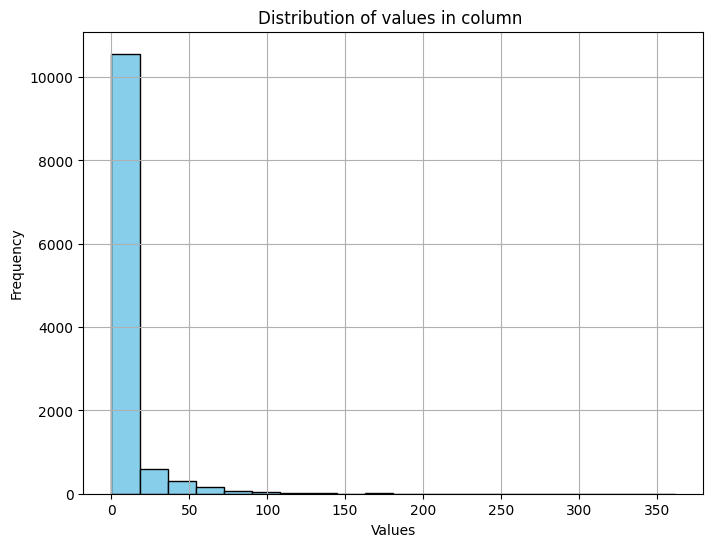

In [224]:

plt.figure(figsize=(8, 6))
plt.hist(Customer_Data['PageValues'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of values in column ')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [225]:
#weird behaviour from administrative data and for some reason it has really high revenue amount within it so ill have to try to save the data and filter it out. 
Customer_Data[Customer_Data["Administrative_Duration"] >1]

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
15,53.00,0.0,1668.285119,-0.395564,0.016313,0.000000,0.0,1,1.0,9.0,...,0,0,0,0,0,0,0,0,0,1
26,64.60,0.0,1135.444444,0.002857,0.009524,0.000000,0.0,2,2.0,1.0,...,0,0,0,0,0,0,0,0,0,1
29,6.00,0.0,1582.750000,0.043478,0.050821,54.179764,0.4,3,2.0,1.0,...,0,0,0,0,0,0,0,0,0,1
37,18.00,0.0,298.000000,0.000000,0.028571,0.000000,0.8,2,2.0,8.0,...,0,0,0,0,0,0,0,0,0,1
40,9.00,0.0,4084.393939,0.000000,0.001795,0.000000,0.0,2,2.0,8.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12313,16.00,86.0,2773.500000,0.000000,0.030000,78.811725,0.0,2,2.0,1.0,...,0,0,0,0,0,0,0,0,0,1
12317,100.50,0.0,1453.640882,0.002105,0.012761,0.000000,0.0,2,2.0,3.0,...,0,0,0,0,0,0,0,1,0,0
12322,76.25,0.0,1075.250000,0.000000,0.004167,0.000000,0.0,2,2.0,4.0,...,0,0,0,0,0,0,0,0,0,1
12323,64.75,0.0,1157.976190,0.000000,0.013953,0.000000,0.0,2,2.0,1.0,...,0,0,0,0,1,0,0,0,0,1


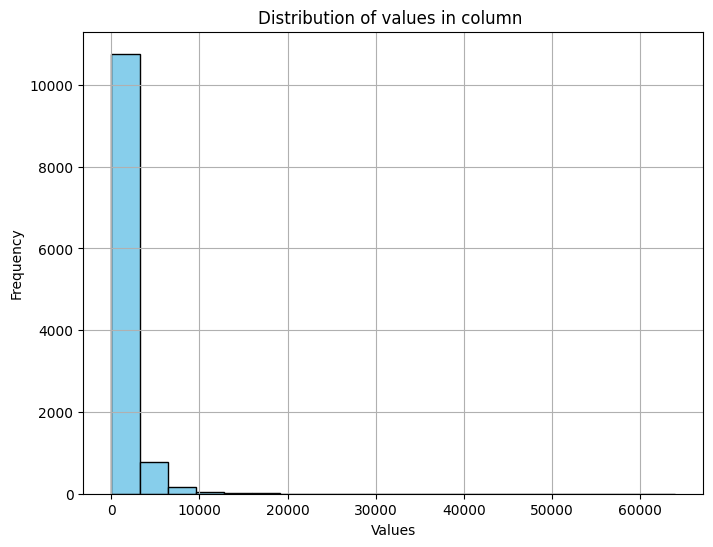

In [226]:

plt.figure(figsize=(8, 6))
plt.hist(Customer_Data['ProductRelated_Duration'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of values in column ')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)

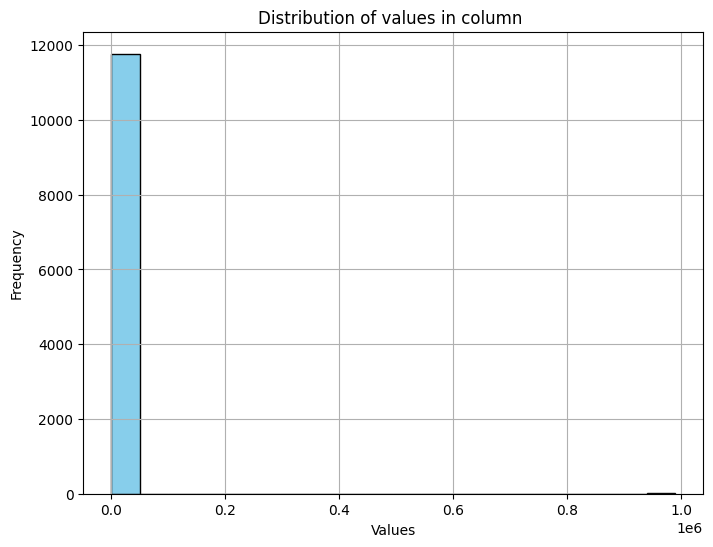

In [227]:

plt.figure(figsize=(8, 6))
plt.hist(Customer_Data['Administrative_Duration'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of values in column ')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)

In [228]:
# now i will lose alot of information due to this but i need good data.. 
# bounce rate is suppose to be a % based value so i remove evrything that is above 1 or below 0. 
# saving to later go back and redo a copied modell for evrything with >1 in administrative duration. 

Customer_Data_save = Customer_Data.copy()


Customer_Data = Customer_Data[Customer_Data["Informational_Duration"] < 400]
Customer_Data = Customer_Data[Customer_Data["ProductRelated_Duration"] < 64000]
Customer_Data = Customer_Data[Customer_Data["BounceRates"] <= 1]
Customer_Data = Customer_Data[Customer_Data["BounceRates"] >= 0]
Customer_Data = Customer_Data[Customer_Data["Administrative_Duration"] <500]
Customer_Data = Customer_Data[Customer_Data["PageValues"] <= 361]


Customer_Data.describe()
# dropping administration duration, now that its a useless column with only 0.
Customer_Data.drop(columns=['Administrative_Duration'], inplace=True)

In [229]:
# finally starting to creat my X, Y tho to prevent data leakage i will also train test split and then after that use gridsearch which will automatically make the validation split for me 
X, y = Customer_Data.drop(columns=['Revenue']), Customer_Data['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [230]:
# i just wanted to try it to find what columns make the biggest difference by using RFC before proceeding with my gridsearch. 
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9099099099099099


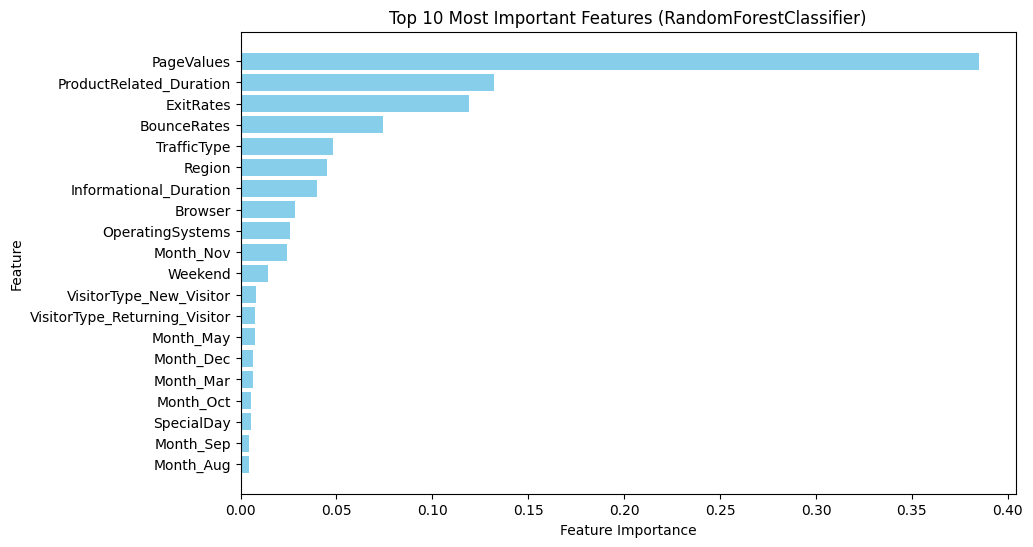

In [231]:
feature_importances = rfc.feature_importances_

# Creating a DataFrame to hold feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sorting my features 
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting 20 of my my columns
top_n = 20 
top_features = feature_importance_df['Feature'][:top_n]
top_importances = feature_importance_df['Importance'][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_importances, align='center', color='skyblue')
plt.yticks(range(top_n), top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features (RandomForestClassifier)')
plt.gca().invert_yaxis()
plt.show()

In [232]:
# scaling my data for general purpose and for future use of knn
scaler = StandardScaler()

# Fit the scaler to your training data
scaler.fit(X_train)
    
# Transform both training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

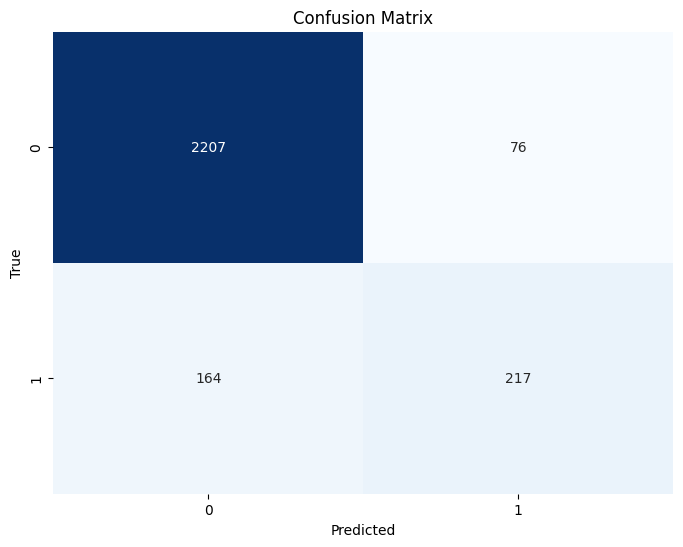

In [233]:
# iam quite happy with this score due to it having a nice precision this means we can use it without having a high risk on giving a discount to someone that dosent buy
# though we sadly had a really bad recall, which i hope other models might be better at. 
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

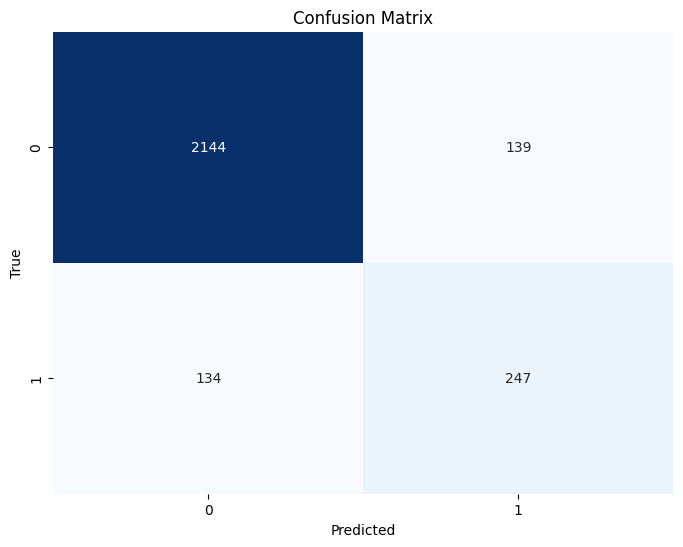

In [234]:
# trying to use umblearn.undersampling to see if it can help fix my undersampling issue, and to maybe make it alittle better and not predicing buyers on people that didnt buy.
from imblearn.over_sampling import RandomOverSampler

rf_classifier_oversampler = RandomForestClassifier(random_state=42)

OverSampler = RandomOverSampler(random_state=42)

X_train_resampled, y_train_resampled = OverSampler.fit_resample(X_train, y_train)
rf_classifier_oversampler.fit(X_train_resampled, y_train_resampled)


y_pred_resampled_over = rf_classifier_oversampler.predict(X_test)

cm = confusion_matrix(y_test, y_pred_resampled_over)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [235]:
# as i thought it didnt really help.
# starting with gridsearch to find the optimal hyperparameters/Models

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [5,15,30,None],
    'max_features': [2,3,4,5,6,None],
    'min_samples_split': [8,12],

}


grid_search_rfc = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy' # using precision since its the issue i have, i really dont mind that i miss a few but i mind predicting incorrectly which will make us lose money. 
                        
                         )

grid_search_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 15, 30, None],
                         'max_features': [2, 3, 4, 5, 6, None],
                         'min_samples_split': [8, 12]},
             scoring='accuracy', verbose=2)

In [236]:

# Get the results as a DataFrame
results_df_rfc = pd.DataFrame(grid_search_rfc.cv_results_)

print(results_df_rfc[['param_max_depth', 'param_max_features', 'mean_test_score']])

# Get the best hyperparameters
best_params = grid_search_rfc.best_params_
print("Best hyperparameters:", best_params)

best_index = np.argmax(grid_search_rfc.cv_results_['mean_test_score'])

results_df_rfc['mean_test_score'][best_index]




   param_max_depth param_max_features  mean_test_score
0                5                  2         0.854104
1                5                  2         0.853103
2                5                  3         0.872247
3                5                  3         0.873373
4                5                  4         0.879379
5                5                  4         0.880631
6                5                  5         0.898398
7                5                  5         0.899024
8                5                  6         0.902402
9                5                  6         0.902277
10               5               None         0.900150
11               5               None         0.900275
12              15                  2         0.896772
13              15                  2         0.897397
14              15                  3         0.899775
15              15                  3         0.900526
16              15                  4         0.901151
17        

0.9034034034034034

Accuracy: 0.9065315315315315


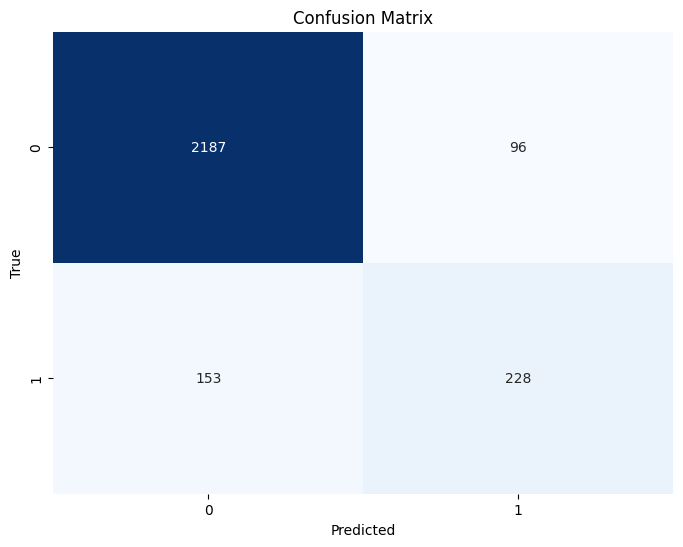

In [237]:
rfc_best_params = RandomForestClassifier(random_state=42 ,max_depth=5,max_features=None,min_samples_split=8)

rfc_best_params.fit(X_train, y_train)

y_pred = rfc_best_params.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [238]:
#doing gridsearch for knn aswell, after this i will probobly test the same thing but with adaboost for randomforest.
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7],  
    'weights': ['uniform', 'distance'],  
}

# Perform grid search with cross-validation
grid_search_knn = GridSearchCV(estimator=knn,
                               param_grid=param_grid,
                               cv=3,
                               n_jobs=-1,
                               verbose=2,
                              )

grid_search_knn.fit(X_train, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [239]:

# Get the results as a DataFrame
results_df_knn = pd.DataFrame(grid_search_knn.cv_results_)

print(results_df_knn[['param_n_neighbors', 'param_weights', 'mean_test_score']])

# Get the best hyperparameters
best_params = grid_search_knn.best_params_
print("Best hyperparameters:", best_params)

best_index = np.argmax(grid_search_knn.cv_results_['mean_test_score'])

results_df_knn['mean_test_score'][best_index]

  param_n_neighbors param_weights  mean_test_score
0                 3       uniform         0.867618
1                 3      distance         0.867618
2                 5       uniform         0.874124
3                 5      distance         0.872998
4                 7       uniform         0.875501
5                 7      distance         0.873749
Best hyperparameters: {'n_neighbors': 7, 'weights': 'uniform'}


0.8755005005005004

Accuracy: 0.8851351351351351


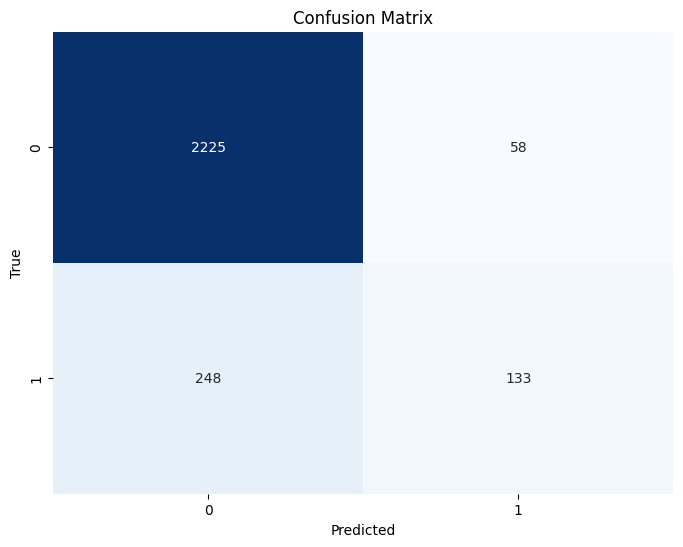

In [240]:
knn_best_params = KNeighborsClassifier(weights='distance',n_neighbors=7)

knn_best_params.fit(X_train, y_train)

y_pred = knn_best_params.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [241]:
#starting with adaboost for randomforest

# using my best Randomforest params to do adaboost on.
My_base_estimator = rfc_best_params

# choosing my AdaBoost model with randomforest
adaboost = AdaBoostClassifier(estimator=My_base_estimator, random_state=42)

param_grid = {
    'n_estimators': [50, 100,], 
    'learning_rate': [ 0.5] 
}

# Perform grid search with cross-validation
grid_search_adaboost = GridSearchCV(estimator=adaboost,
                                    param_grid=param_grid,
                                    cv=3,
                                    n_jobs=-1
                                   )

grid_search_adaboost.fit(X_train, y_train)

best_params_adaboost = grid_search_adaboost.best_params_



In [242]:

# Get the results as a DataFrame
results_df_adaboost = pd.DataFrame(grid_search_adaboost.cv_results_)

print(results_df_adaboost[['param_n_estimators', 'param_learning_rate', 'mean_test_score']])

# Get the best hyperparameters
best_params_adaboost = grid_search_adaboost.best_params_
print("Best hyperparameters:", best_params_adaboost)

best_index_adaboost = np.argmax(grid_search_adaboost.cv_results_['mean_test_score'])

results_df_adaboost['mean_test_score'][best_index_adaboost]

  param_n_estimators param_learning_rate  mean_test_score
0                 50                 0.5         0.897523
1                100                 0.5         0.894770
Best hyperparameters: {'learning_rate': 0.5, 'n_estimators': 50}


0.8975225225225225

Accuracy: 0.9069069069069069


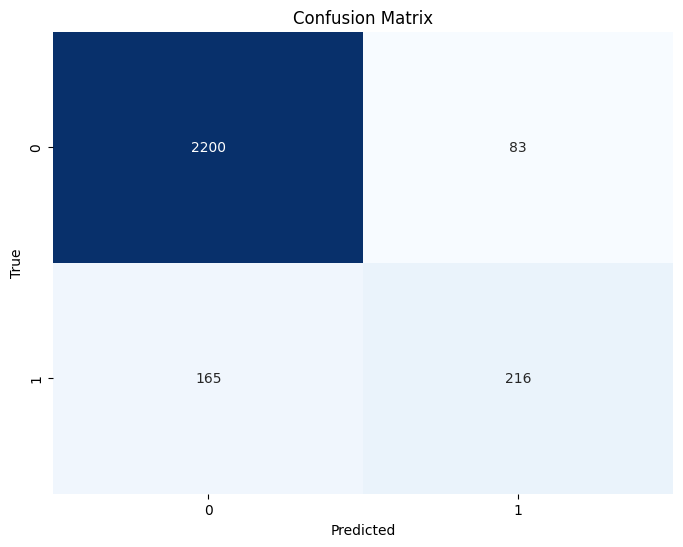

In [243]:
# seems like it will be random forest, im alittle tired of it so i will research into XGboost which may be better.
# problem is Knn is fast and great for real time due to it being a "lazy learner", but adaboost is impossible cause its too long,randomforest could definetly work. 
# but i want better score which Xgboost might give if it does it must be a decent amount better because
# Xgboost takes more computation making it be longer and less good for realtime function. 

adaboost_with_best_rf = AdaBoostClassifier(estimator=rfc_best_params, random_state=42, learning_rate=0.5, n_estimators=50)

adaboost_with_best_rf.fit(X_train, y_train)

y_pred = adaboost_with_best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [244]:
#trying out Xgboost

xgb_model = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2,3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)



Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}


In [245]:
cv_results = grid_search.cv_results_

cv_results['mean_test_score']

array([0.88838839, 0.89702202, 0.89652152, 0.89289289, 0.9004004 ,
       0.90102603, 0.89164164, 0.90027528, 0.90115115, 0.89301802,
       0.9019019 , 0.90202703, 0.90077578, 0.9009009 , 0.90015015,
       0.9014014 , 0.8988989 , 0.90027528, 0.90065065, 0.8988989 ,
       0.8988989 , 0.8993994 , 0.89977477, 0.89802302, 0.9009009 ,
       0.9004004 , 0.89752252, 0.89902402, 0.89727227, 0.89326827,
       0.89777277, 0.89214214, 0.89214214, 0.89476977, 0.89089089,
       0.89089089])

## Final report.

In [246]:
# i have decided to use Xgboost to train my model due to it being.
# a extreme Gradient Boosting model, and is a machine learning algorithm that is good for a variety of tasks and scenarios. for example when you have imbalanced data, and when u have a high dimension dataset, which is why i believed it would do well.



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2283
           1       0.75      0.59      0.66       381

    accuracy                           0.91      2664
   macro avg       0.84      0.78      0.80      2664
weighted avg       0.91      0.91      0.91      2664



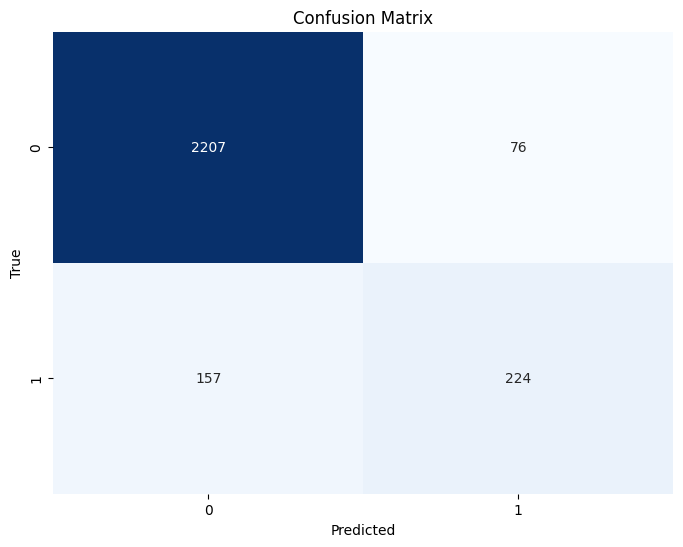

In [247]:
xgb_model = xgb.XGBClassifier(learning_rate=0.01, n_estimators=300, max_depth=6)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)


# Calculate other classification metrics
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### while it u can see that the model is very good at predicting correct most of the time but it still misses alot of people who might buy, this is what we call recall, our recall % is quite low meaning it misses alot of people who buy and guess that they
### will not buy, though the model is great at not guessing incorrect when it gets to the oppisent scenario.

### this is definetly a model who can in general get a good sense of if someone will buy or not but i do not reccomend that, we take it for granted rather use it for guidence when evaluating a customer. 